#### Train the Neural Network for simulating OR gate functionality using batch training algorithm

Import the required packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Declare input and target data

|input_1||input_2||target_output|
|-------||-------||-------------|
|0.1    || 0.1   ||0.1          |
|0.1    || 0.9   ||0.9          |
|0.9    || 0.1   ||0.9          |
|0.1    || 0.9   ||0.9          |

In [2]:
input_data=np.array([[1, 0.1, 0.1], [1, 0.1, 0.9], [1, 0.9, 0.1], [1, 0.9, 0.9]])
input_data

array([[1. , 0.1, 0.1],
       [1. , 0.1, 0.9],
       [1. , 0.9, 0.1],
       [1. , 0.9, 0.9]])

In [3]:
target_output=np.array([0.1, 0.9, 0.9, 0.9])
target_output

array([0.1, 0.9, 0.9, 0.9])

Define helper functions

In [4]:
def calculate_ouptut(predictors, weights):
    output=np.dot(weights, np.transpose(predictors))
    activation_output=1.0/(1+np.exp(-output))
    return activation_output

In [5]:
def plot_graph(iteration, yterm, ylabel):
    plt.plot(np.linspace(1,iteration, iteration), yterm, linewidth=2.0)
    plt.title("Epochs vs "+ylabel)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)

#### Batch training
In each epoch all the training samples are considered for changing the weights.

In [6]:
def batch_training(x, y, learning_rate=0.01, error_threshold=0.01, print_messages=True):
    np.random.seed(1)
    weights = np.random.rand(1,3)
    error=10000
    iteration=1
    error_in_iterations=[]
    weights_in_iterations=[]
    while(error>error_threshold):
        if print_messages:
            print("Iteration: ", iteration)
            print("================================")
            print("Weights: ", weights)
        output=calculate_ouptut(x, weights)
        if print_messages:
            print("Ouptut: ", output)
        error=np.sum(np.power((output-y), 2))
        error_in_iterations.append(error)
        if print_messages:
            print("Error: ", error)
            print("Debugging")
            print("=============================")
            print((y-output)*output*(1-output))
            print(np.dot((y-output)*output*(1-output), x))
        change_in_wt=-learning_rate*np.dot((y-output)*output*(1-output), x)
        weights=weights-change_in_wt
        weights_in_iterations.append(weights)
        iteration+=1
    if print_messages:
        print("Weights Converged!!!!", weights)
        print("Iteration Count:", iteration)
    return iteration-1, weights, \
           np.array(error_in_iterations), np.array(weights_in_iterations)

In [7]:
num_of_epochs, final_weights, errors_in_epoch, weights_in_epoch = \
batch_training(input_data,target_output,learning_rate=0.1, print_messages=True)

Iteration:  1
Weights:  [[4.17022005e-01 7.20324493e-01 1.14374817e-04]]
Ouptut:  [[0.61988636 0.61990792 0.74370694 0.74372438]]
Error:  0.39758299077368114
Debugging
[[-0.1224994   0.06599588  0.02979054  0.02978589]]
[[0.00307291 0.04796843 0.07693271]]
Iteration:  2
Weights:  [[0.4173293  0.72512134 0.00780765]]
Ouptut:  [[0.62025299 0.62172309 0.74473368 0.74591928]]
Error:  0.39594971600406637
Debugging
[[-0.12253998  0.06544613  0.02951697  0.02920195]]
[[0.00162507 0.04713764 0.07588097]]
Iteration:  3
Weights:  [[0.4174918  0.7298351  0.01539574]]
Ouptut:  [[0.62058097 0.6234767  0.74571408 0.74804254]]
Error:  0.394364897936829
Debugging
[[-0.12257612  0.06491481  0.0292564   0.02864017]]
[[0.00023527 0.04634078 0.07486751]]
Iteration:  4
Weights:  [[0.41751533 0.73446918 0.02288249]]
Ouptut:  [[0.62087187 0.62517128 0.74665023 0.7500974 ]]
Error:  0.3928252655256314
Debugging
[[-0.12260802  0.0644012   0.0290082   0.02809944]]
[[-0.00109918  0.04557619  0.07389059]]
Iteratio

Iteration:  189
Weights:  [[-0.11037411  1.24688106  0.88440893]]
Ouptut:  [[0.52566614 0.6921696  0.75030877 0.85909419]]
Error:  0.24846588988462912
Debugging
[[-0.10613613  0.0442826   0.02804398  0.0049517 ]]
[[-0.02885784  0.02351076  0.03650166]]
Iteration:  190
Weights:  [[-0.1132599   1.24923214  0.8880591 ]]
Ouptut:  [[0.5250962  0.69230477 0.75023292 0.8593984 ]]
Error:  0.2479227542366143
Debugging
[[-0.10600632  0.044243    0.02806388  0.00490601]]
[[-0.02879343  0.02349656  0.03643986]]
Iteration:  191
Weights:  [[-0.11613924  1.2515818   0.89170308]]
Ouptut:  [[0.52452761 0.69244007 0.75015792 0.85970201]]
Error:  0.24738139484849928
Debugging
[[-0.1058765   0.04420338  0.02808356  0.00486052]]
[[-0.02872905  0.02348236  0.03637821]]
Iteration:  192
Weights:  [[-0.11901214  1.25393003  0.89534091]]
Ouptut:  [[0.52396037 0.69257549 0.75008374 0.86000502]]
Error:  0.24684180602202466
Debugging
[[-0.1057467   0.04416372  0.02810302  0.00481525]]
[[-0.0286647   0.02346815  0.

Weights:  [[-0.56162691  1.67002936  1.48559488]]
Ouptut:  [[0.4387924  0.7195865  0.748374   0.90707521]]
Error:  0.1703698242045872
Debugging
[[-0.08342886  0.03640416  0.02855275 -0.00059637]]
[[-0.01906832  0.02045827  0.0267394 ]]
Iteration:  382
Weights:  [[-0.56353374  1.67207519  1.48826882]]
Ouptut:  [[0.43843909 0.71972859 0.748412   0.90727234]]
Error:  0.17007060899892565
Debugging
[[-0.08332718  0.03636423  0.02854273 -0.00061182]]
[[-0.01903203  0.02044153  0.02669873]]
Iteration:  383
Weights:  [[-0.56543694  1.67411934  1.4909387 ]]
Ouptut:  [[0.4380866  0.7198706  0.74845032 0.90746897]]
Error:  0.16977224113259987
Debugging
[[-0.08322567  0.03632434  0.02853263 -0.00062716]]
[[-0.01899587  0.02042479  0.02665816]]
Iteration:  384
Weights:  [[-0.56733653  1.67616182  1.49360451]]
Ouptut:  [[0.43773492 0.72001252 0.74848896 0.90766509]]
Error:  0.16947471728282573
Debugging
[[-0.08312435  0.03628448  0.02852244 -0.0006424 ]]
[[-0.01895983  0.02040805  0.02661768]]
Itera

Error:  0.12531598751647538
Debugging
[[-0.06689252  0.02950121  0.02566989 -0.00218081]]
[[-0.01390223  0.01740104  0.02046609]]
Iteration:  574
Weights:  [[-0.87474896  2.03475343  1.93658924]]
Ouptut:  [[0.38281554 0.74491185 0.75954526 0.93699474]]
Error:  0.12513310782520956
Debugging
[[-0.06682021  0.02946957  0.02565213 -0.00218401]]
[[-0.01388251  0.01738625  0.0204402 ]]
Iteration:  575
Weights:  [[-0.87613722  2.03649205  1.93863326]]
Ouptut:  [[0.38257694 0.74503063 0.75961482 0.93711366]]
Error:  0.12495065215404585
Debugging
[[-0.06674801  0.02943798  0.02563435 -0.00218717]]
[[-0.01386285  0.01737146  0.02041436]]
Iteration:  576
Weights:  [[-0.8775235  2.0382292  1.9406747]]
Ouptut:  [[0.38233876 0.74514929 0.75968444 0.93723227]]
Error:  0.12476861912478161
Debugging
[[-0.06667595  0.02940643  0.02561657 -0.0021903 ]]
[[-0.01384324  0.01735669  0.02038858]]
Iteration:  577
Weights:  [[-0.87890783  2.03996487  1.94271356]]
Ouptut:  [[0.38210101 0.74526781 0.75975411 0.93

[[-0.05497922  0.02419527  0.0222347  -0.00236359]]
[[-0.01091284  0.0148056   0.01637406]]
Iteration:  766
Weights:  [[-1.11056457  2.34302026  2.2874783 ]]
Ouptut:  [[0.34354981 0.76539125 0.7732758  0.95507881]]
Error:  0.09652872124096049
Debugging
[[-0.05492617  0.02417135  0.02221733 -0.00236306]]
[[-0.01090055  0.01479336  0.01635658]]
Iteration:  767
Weights:  [[-1.11165462  2.3444996   2.28911396]]
Ouptut:  [[0.34337425 0.76548641 0.77334679 0.95515226]]
Error:  0.0964077406446034
Debugging
[[-0.0548732   0.02414747  0.02219997 -0.00236253]]
[[-0.01088828  0.01478113  0.01633913]]
Iteration:  768
Weights:  [[-1.11274345  2.34597771  2.29074787]]
Ouptut:  [[0.34319894 0.76558145 0.77341774 0.95522554]]
Error:  0.0962869997922139
Debugging
[[-0.05482031  0.02412363  0.02218262 -0.00236198]]
[[-0.01087604  0.01476891  0.01632171]]
Iteration:  769
Weights:  [[-1.11383105  2.3474546   2.29238004]]
Ouptut:  [[0.34302388 0.76567638 0.77348868 0.95529864]]
Error:  0.09616649804010245


Weights:  [[-1.31243769  2.62369859  2.59167571]]
Ouptut:  [[0.3119754  0.78286488 0.78718811 0.96711813]]
Error:  0.0758855709506228
Debugging
[[-0.04549983  0.0199115   0.01889858 -0.0021344 ]]
[[-0.00882415  0.01252893  0.01333927]]
Iteration:  973
Weights:  [[-1.3133201   2.62495148  2.59300963]]
Ouptut:  [[0.31184153 0.78294025 0.78725152 0.96716407]]
Error:  0.07580305180245094
Debugging
[[-0.04546043  0.0198937   0.01888385 -0.00213298]]
[[-0.00881585  0.01251912  0.01332699]]
Iteration:  974
Weights:  [[-1.31420169  2.62620339  2.59434233]]
Ouptut:  [[0.31170783 0.78301553 0.7873149  0.96720992]]
Error:  0.07572067647283748
Debugging
[[-0.04542108  0.01987592  0.01886914 -0.00213156]]
[[-0.00880758  0.01250931  0.01331473]]
Iteration:  975
Weights:  [[-1.31508244  2.62745432  2.5956738 ]]
Ouptut:  [[0.31157429 0.78309073 0.78737822 0.96725566]]
Error:  0.07563844463133128
Debugging
[[-0.04538179  0.01985817  0.01885443 -0.00213013]]
[[-0.00879932  0.01249951  0.0133025 ]]
Itera

Weights:  [[-1.47848194  2.8625006   2.84300767]]
Ouptut:  [[0.28742338 0.79681004 0.79932314 0.97482669]]
Error:  0.06151055433282184
Debugging
[[-0.0383864   0.01670685  0.01614914 -0.00183622]]
[[-0.00736664  0.01071367  0.01115984]]
Iteration:  1179
Weights:  [[-1.47921861  2.86357197  2.84412366]]
Ouptut:  [[0.28731732 0.79687073 0.79937754 0.97485691]]
Error:  0.061451858951936264
Debugging
[[-0.03835623  0.01669331  0.01613713 -0.00183481]]
[[-0.0073606   0.0107058   0.01115073]]
Iteration:  1180
Weights:  [[-1.47995467  2.86464255  2.84523873]]
Ouptut:  [[0.28721136 0.79693135 0.7994319  0.97488706]]
Error:  0.06139325565267557
Debugging
[[-0.0383261   0.01667978  0.01612514 -0.00183341]]
[[-0.00735458  0.01069793  0.01114164]]
Iteration:  1181
Weights:  [[-1.48069013  2.86571234  2.8463529 ]]
Ouptut:  [[0.28710552 0.79699191 0.79948621 0.97491716]]
Error:  0.061334744247155466
Debugging
[[-0.038296    0.01666628  0.01611317 -0.001832  ]]
[[-0.00734856  0.01069008  0.01113256]]

Iteration:  1381
Weights:  [[-1.61670669  3.06492376  3.05242378]]
Ouptut:  [[0.267965   0.80798455 0.80953122 0.9799428 ]]
Error:  0.05125453670228739
Debugging
[[-0.03294797  0.01427578  0.01394942 -0.00157127]]
[[-0.00629404  0.00927312  0.00953421]]
Iteration:  1382
Weights:  [[-1.61733609  3.06585107  3.0533772 ]]
Ouptut:  [[0.26787844 0.80803441 0.80957756 0.97996369]]
Error:  0.0512112508728764
Debugging
[[-0.03292425  0.01426522  0.01393968 -0.00157008]]
[[-0.00628942  0.00926674  0.00952718]]
Iteration:  1383
Weights:  [[-1.61796503  3.06677774  3.05432992]]
Ouptut:  [[0.26779196 0.80808422 0.80962385 0.97998454]]
Error:  0.051168027084340706
Debugging
[[-0.03290055  0.01425468  0.01392995 -0.00156888]]
[[-0.00628481  0.00926037  0.00952015]]
Iteration:  1384
Weights:  [[-1.61859351  3.06770378  3.05528193]]
Ouptut:  [[0.26770556 0.80813399 0.80967011 0.98000536]]
Error:  0.051124865221699026
Debugging
[[-0.03287688  0.01424414  0.01392023 -0.00156769]]
[[-0.0062802   0.009254

[[-0.02812561  0.01213826  0.01195057 -0.00132637]]
[[-0.00536315  0.00796305  0.0081132 ]]
Iteration:  1612
Weights:  [[-1.75087245  3.2634287   3.25554141]]
Ouptut:  [[0.24993192 0.81838706 0.81932301 0.98395528]]
Error:  0.042697517653409414
Debugging
[[-0.02810713  0.0121301   0.01194284 -0.00132543]]
[[-0.00535961  0.00795797  0.00810778]]
Iteration:  1613
Weights:  [[-1.75140841  3.2642245   3.25635219]]
Ouptut:  [[0.24986157 0.81842768 0.81936169 0.98396964]]
Error:  0.042665969799478905
Debugging
[[-0.02808867  0.01212196  0.01193512 -0.00132449]]
[[-0.00535607  0.0079529   0.00810237]]
Iteration:  1614
Weights:  [[-1.75194402  3.26501979  3.25716243]]
Ouptut:  [[0.24979128 0.81846827 0.81940034 0.98398398]]
Error:  0.042634463182761165
Debugging
[[-0.02807023  0.01211382  0.01192741 -0.00132355]]
[[-0.00535254  0.00794784  0.00809696]]
Iteration:  1615
Weights:  [[-1.75247927  3.26581457  3.25797212]]
Ouptut:  [[0.24972105 0.81850882 0.81943897 0.98399829]]
Error:  0.042602997

Error:  0.036403097189661865
Debugging
[[-0.02431654  0.01046319  0.01035011 -0.00113363]]
[[-0.00463687  0.0069095   0.00699996]]
Iteration:  1843
Weights:  [[-1.86600242  3.43471648  3.42953719]]
Ouptut:  [[0.23512825 0.82693412 0.8275263  0.98676838]]
Error:  0.036379456063318105
Debugging
[[-0.02430186  0.01045676  0.01034392 -0.0011329 ]]
[[-0.00463408  0.00690541  0.00699568]]
Iteration:  1844
Weights:  [[-1.86646583  3.43540702  3.43023675]]
Ouptut:  [[0.23506992 0.82696779 0.82755885 0.98677866]]
Error:  0.036355843370398044
Debugging
[[-0.0242872   0.01045033  0.01033773 -0.00113216]]
[[-0.0046313   0.00690133  0.00699141]]
Iteration:  1845
Weights:  [[-1.86692896  3.43609716  3.43093589]]
Ouptut:  [[0.23501163 0.82700143 0.82759137 0.98678893]]
Error:  0.036332259066877544
Debugging
[[-0.02427255  0.01044391  0.01033155 -0.00113143]]
[[-0.00462852  0.00689724  0.00698714]]
Iteration:  1846
Weights:  [[-1.86739181  3.43678688  3.43163461]]
Ouptut:  [[0.23495338 0.82703504 0.82

Weights:  [[-1.96575962  3.5834741   3.57995292]]
Ouptut:  [[0.22280109 0.8340415  0.83443105 0.98880826]]
Error:  0.03161682630823775
Debugging
[[-0.02126433  0.00912973  0.00905874 -0.0009828 ]]
[[-0.00405866  0.00605489  0.00611168]]
Iteration:  2074
Weights:  [[-1.96616549  3.58407959  3.58056409]]
Ouptut:  [[0.22275188 0.83406984 0.8344587  0.98881589]]
Error:  0.03159873394461884
Debugging
[[-0.02125246  0.00912456  0.0090537  -0.00098222]]
[[-0.00405642  0.00605155  0.00610823]]
Iteration:  2075
Weights:  [[-1.96657113  3.58468475  3.58117491]]
Ouptut:  [[0.22270271 0.83409815 0.83448634 0.9888235 ]]
Error:  0.031580661734644404
Debugging
[[-0.0212406   0.00911939  0.00904867 -0.00098164]]
[[-0.00405417  0.00604821  0.00610479]]
Iteration:  2076
Weights:  [[-1.96697655  3.58528957  3.58178539]]
Ouptut:  [[0.22265357 0.83412645 0.83451396 0.98883111]]
Error:  0.031562609649455835
Debugging
[[-0.02122875  0.00911423  0.00904365 -0.00098106]]
[[-0.00405193  0.00604488  0.00610134]]

Iteration:  2304
Weights:  [[-2.05393439  3.71500821  3.71255126]]
Ouptut:  [[0.21228971 0.84008526 0.84034914 0.99034779]]
Error:  0.027919704736215793
Debugging
[[-0.0187774   0.00804907  0.00800291 -0.00086364]]
[[-0.00358906  0.00535251  0.00538944]]
Iteration:  2305
Weights:  [[-2.0542933   3.71554346  3.7130902 ]]
Ouptut:  [[0.21224766 0.84010939 0.84037284 0.9903536 ]]
Error:  0.027905593050106117
Debugging
[[-0.01876765  0.00804484  0.00799876 -0.00086318]]
[[-0.00358722  0.00534975  0.00538661]]
Iteration:  2306
Weights:  [[-2.05465202  3.71607844  3.71362886]]
Ouptut:  [[0.21220564 0.84013351 0.84039654 0.9903594 ]]
Error:  0.027891496010190607
Debugging
[[-0.01875791  0.00804062  0.00799462 -0.00086272]]
[[-0.00358539  0.00534698  0.00538378]]
Iteration:  2307
Weights:  [[-2.05501056  3.71661313  3.71416724]]
Ouptut:  [[0.21216364 0.84015761 0.84042021 0.9903652 ]]
Error:  0.027877413596963142
Debugging
[[-0.01874818  0.0080364   0.00799049 -0.00086226]]
[[-0.00358355  0.005

[[-0.01672942  0.00716309  0.00713211 -0.00076867]]
[[-0.00320289  0.00477046  0.00479524]]
Iteration:  2535
Weights:  [[-2.13224581  3.83173082  3.82997576]]
Ouptut:  [[0.20325471 0.84526098 0.84544453 0.9915348 ]]
Error:  0.025012813017702133
Debugging
[[-0.0167213   0.00715958  0.00712866 -0.0007683 ]]
[[-0.00320136  0.00476815  0.00479289]]
Iteration:  2536
Weights:  [[-2.13256594  3.83220764  3.83045505]]
Ouptut:  [[0.20321835 0.84528176 0.84546504 0.99153933]]
Error:  0.025001624592172908
Debugging
[[-0.01671318  0.00715608  0.00712521 -0.00076793]]
[[-0.00319983  0.00476584  0.00479054]]
Iteration:  2537
Weights:  [[-2.13288593  3.83268422  3.83093411]]
Ouptut:  [[0.20318201 0.84530253 0.84548553 0.99154386]]
Error:  0.024990447042902278
Debugging
[[-0.01670507  0.00715258  0.00712176 -0.00076756]]
[[-0.0031983   0.00476353  0.00478818]]
Iteration:  2538
Weights:  [[-2.13320576  3.83316058  3.83141292]]
Ouptut:  [[0.2031457  0.84532329 0.84550601 0.99154839]]
Error:  0.024979280

Ouptut:  [[0.19543551 0.84972077 0.84985156 0.99246715]]
Error:  0.02270097652073849
Debugging
[[-0.01500632  0.00642043  0.00639914 -0.00069129]]
[[-0.00287806  0.00427847  0.0042955 ]]
Iteration:  2766
Weights:  [[-2.20235743  3.93606286  3.93478382]]
Ouptut:  [[0.19540374 0.84973885 0.84986945 0.99247077]]
Error:  0.02269197062011263
Debugging
[[-0.01499948  0.00641748  0.00639623 -0.00069099]]
[[-0.00287677  0.00427651  0.00429351]]
Iteration:  2767
Weights:  [[-2.20264511  3.93649051  3.93521317]]
Ouptut:  [[0.19537198 0.84975692 0.84988733 0.99247438]]
Error:  0.02268297295971629
Debugging
[[-0.01499264  0.00641454  0.00639332 -0.00069069]]
[[-0.00287548  0.00427455  0.00429153]]
Iteration:  2768
Weights:  [[-2.20293265  3.93691796  3.93564232]]
Ouptut:  [[0.19534025 0.84977497 0.8499052  0.99247799]]
Error:  0.02267398352991978
Debugging
[[-0.01498581  0.0064116   0.00639041 -0.00069039]]
[[-0.00287419  0.0042726   0.00428955]]
Iteration:  2769
Weights:  [[-2.20322007  3.9373452

Weights:  [[-2.2653028   4.029532    4.02858247]]
Ouptut:  [[0.18854513 0.8536318  0.85372669 0.99322017]]
Error:  0.020821469473377548
Debugging
[[-0.01354704  0.00579345  0.00577849 -0.00062773]]
[[-0.00260283  0.00386033  0.00387229]]
Iteration:  2997
Weights:  [[-2.26556308  4.02991803  4.0289697 ]]
Ouptut:  [[0.18851714 0.85364765 0.85374241 0.9932231 ]]
Error:  0.020814136763197155
Debugging
[[-0.01354121  0.00579095  0.00577601 -0.00062748]]
[[-0.00260173  0.00385865  0.0038706 ]]
Iteration:  2998
Weights:  [[-2.26582326  4.0303039   4.02935676]]
Ouptut:  [[0.18848917 0.85366349 0.85375812 0.99322603]]
Error:  0.02080681039283834
Debugging
[[-0.01353539  0.00578846  0.00577354 -0.00062723]]
[[-0.00260063  0.00385698  0.00386892]]
Iteration:  2999
Weights:  [[-2.26608332  4.0306896   4.02974365]]
Ouptut:  [[0.18846121 0.85367931 0.85377382 0.99322896]]
Error:  0.020799490355320242
Debugging
[[-0.01352957  0.00578596  0.00577107 -0.00062698]]
[[-0.00259953  0.00385531  0.00386723]

[[-0.0023681   0.00350311  0.0035117 ]]
Iteration:  3227
Weights:  [[-2.32264973  4.11447808  4.11376348]]
Ouptut:  [[0.18245154 0.85707253 0.85714254 0.99383552]]
Error:  0.01928289088937033
Debugging
[[-0.01229872  0.00525858  0.00524786 -0.00057488]]
[[-0.00236716  0.00350167  0.00351024]]
Iteration:  3228
Weights:  [[-2.32288644  4.11482824  4.1141145 ]]
Ouptut:  [[0.18242669 0.85708652 0.85715644 0.99383793]]
Error:  0.01927685474251255
Debugging
[[-0.01229371  0.00525644  0.00524573 -0.00057467]]
[[-0.00236621  0.00350023  0.00350879]]
Iteration:  3229
Weights:  [[-2.32312306  4.11517827  4.11446538]]
Ouptut:  [[0.18240186 0.8571005  0.85717034 0.99384035]]
Error:  0.0192708235456999
Debugging
[[-0.01228871  0.0052543   0.00524361 -0.00057446]]
[[-0.00236526  0.00349879  0.00350734]]
Iteration:  3230
Weights:  [[-2.32335959  4.11552815  4.11481612]]
Ouptut:  [[0.18237703 0.85711448 0.85718423 0.99384276]]
Error:  0.01926479729377896
Debugging
[[-0.0122837   0.00525216  0.00524148

Debugging
[[-0.01122562  0.00479988  0.00479206 -0.00053062]]
[[-0.0021643   0.00319272  0.00319898]]
Iteration:  3458
Weights:  [[-2.37493323  4.19171503  4.19117015]]
Ouptut:  [[0.17702356 0.86012053 0.86017297 0.99434567]]
Error:  0.018010299794185832
Debugging
[[-0.01122127  0.00479803  0.00479021 -0.00053045]]
[[-0.00216348  0.00319147  0.00319772]]
Iteration:  3459
Weights:  [[-2.37514958  4.19203417  4.19148992]]
Ouptut:  [[0.17700135 0.86013297 0.86018534 0.99434769]]
Error:  0.018005282475076614
Debugging
[[-0.01121693  0.00479617  0.00478837 -0.00053027]]
[[-0.00216266  0.00319022  0.00319646]]
Iteration:  3460
Weights:  [[-2.37536585  4.19235319  4.19180957]]
Ouptut:  [[0.17697916 0.86014539 0.8601977  0.9943497 ]]
Error:  0.018000269071917634
Debugging
[[-0.01121259  0.00479432  0.00478653 -0.00053009]]
[[-0.00216183  0.00318897  0.0031952 ]]
Iteration:  3461
Weights:  [[-2.37558203  4.19267209  4.19212909]]
Ouptut:  [[0.17695697 0.86015782 0.86021006 0.99435172]]
Error:  0

Ouptut:  [[0.17217752 0.8628262  0.86286604 0.99477228]]
Error:  0.016952201919311575
Debugging
[[-0.01028764  0.00439978  0.004394   -0.00049285]]
[[-0.00198671  0.00292224  0.00292687]]
Iteration:  3689
Weights:  [[-2.42282275  4.26225954  4.26183926]]
Ouptut:  [[0.17215754 0.86283732 0.86287711 0.99477398]]
Error:  0.01694799208093896
Debugging
[[-0.01028384  0.00439817  0.00439239 -0.0004927 ]]
[[-0.00198599  0.00292115  0.00292577]]
Iteration:  3690
Weights:  [[-2.42302135  4.26255165  4.26213184]]
Ouptut:  [[0.17213757 0.86284844 0.86288818 0.99477569]]
Error:  0.01694378537998801
Debugging
[[-0.01028005  0.00439655  0.00439078 -0.00049255]]
[[-0.00198527  0.00292006  0.00292467]]
Iteration:  3691
Weights:  [[-2.42321988  4.26284366  4.2624243 ]]
Ouptut:  [[0.17211761 0.86285955 0.86289925 0.99477739]]
Error:  0.016939581813510633
Debugging
[[-0.01027626  0.00439494  0.00438917 -0.0004924 ]]
[[-0.00198455  0.00291896  0.00292358]]
Iteration:  3692
Weights:  [[-2.42341833  4.26313

Weights:  [[-2.46668622  4.32668389  4.32635604]]
Ouptut:  [[0.16778852 0.86526228 0.86529285 0.99513615]]
Error:  0.01605746571733082
Debugging
[[-0.00946569  0.00404984  0.0040455  -0.00046048]]
[[-0.00183081  0.00268494  0.00268841]]
Iteration:  3920
Weights:  [[-2.46686931  4.32695238  4.32662489]]
Ouptut:  [[0.16777046 0.86527227 0.86530281 0.99513761]]
Error:  0.016053908683119598
Debugging
[[-0.00946235  0.00404843  0.00404409 -0.00046035]]
[[-0.00183018  0.00268398  0.00268744]]
Iteration:  3921
Weights:  [[-2.46705232  4.32722078  4.32689363]]
Ouptut:  [[0.1677524  0.86528226 0.86531277 0.99513906]]
Error:  0.016050354186772448
Debugging
[[-0.00945902  0.00404701  0.00404268 -0.00046022]]
[[-0.00182955  0.00268301  0.00268648]]
Iteration:  3922
Weights:  [[-2.46723528  4.32748908  4.32716228]]
Ouptut:  [[0.16773436 0.86529225 0.86532272 0.99514051]]
Error:  0.016046802226014817
Debugging
[[-0.00945569  0.00404559  0.00404127 -0.00046009]]
[[-0.00182892  0.00268205  0.00268551]

[[-0.00874367  0.00374298  0.00373968 -0.0004326 ]]
[[-0.00169362  0.0024763   0.00247894]]
Iteration:  4150
Weights:  [[-2.50736187  4.38624775  4.38598996]]
Ouptut:  [[0.16381144 0.86745643 0.86748014 0.99544812]]
Error:  0.015298868667190236
Debugging
[[-0.00874072  0.00374172  0.00373843 -0.00043249]]
[[-0.00169306  0.00247545  0.00247808]]
Iteration:  4151
Weights:  [[-2.50753117  4.38649529  4.38623777]]
Ouptut:  [[0.16379504 0.86746545 0.86748914 0.99544937]]
Error:  0.015295842156809333
Debugging
[[-0.00873777  0.00374047  0.00373718 -0.00043238]]
[[-0.00169249  0.00247459  0.00247722]]
Iteration:  4152
Weights:  [[-2.50770042  4.38674275  4.38648549]]
Ouptut:  [[0.16377864 0.86747447 0.86749813 0.99545062]]
Error:  0.015292817718998637
Debugging
[[-0.00873482  0.00373922  0.00373593 -0.00043227]]
[[-0.00169193  0.00247374  0.00247637]]
Iteration:  4153
Weights:  [[-2.50786962  4.38699012  4.38673313]]
Ouptut:  [[0.16376225 0.86748349 0.86750712 0.99545187]]
Error:  0.015289795

Error:  0.014653997239297892
Debugging
[[-0.00810014  0.00346989  0.00346737 -0.00040821]]
[[-0.00157109  0.00229021  0.00229224]]
Iteration:  4381
Weights:  [[-2.54503605  4.44124999  4.44104563]]
Ouptut:  [[0.16019115 0.86944154 0.8694601  0.99571794]]
Error:  0.014651404116533076
Debugging
[[-0.00809751  0.00346878  0.00346626 -0.00040811]]
[[-0.00157059  0.00228945  0.00229147]]
Iteration:  4382
Weights:  [[-2.54519311  4.44147894  4.44127478]]
Ouptut:  [[0.16017619 0.86944972 0.86946826 0.99571903]]
Error:  0.014648812702472033
Debugging
[[-0.00809489  0.00346767  0.00346515 -0.00040802]]
[[-0.00157009  0.00228869  0.00229071]]
Iteration:  4383
Weights:  [[-2.54535012  4.44170781  4.44150385]]
Ouptut:  [[0.16016123 0.8694579  0.86947642 0.99572012]]
Error:  0.01464622299571127
Debugging
[[-0.00809226  0.00346655  0.00346404 -0.00040792]]
[[-0.00156959  0.00228794  0.00228995]]
Iteration:  4384
Weights:  [[-2.54550708  4.4419366   4.44173285]]
Ouptut:  [[0.16014627 0.86946607 0.869

Weights:  [[-2.57988864  4.49197962  4.49181627]]
Ouptut:  [[0.15689575 0.87123739 0.87125204 0.99595221]]
Error:  0.01409768541421848
Debugging
[[-0.00752614  0.00322667  0.00322471 -0.00038682]]
[[-0.00146158  0.00212415  0.00212572]]
Iteration:  4612
Weights:  [[-2.5800348   4.49219204  4.49202885]]
Ouptut:  [[0.15688204 0.87124483 0.87125948 0.99595316]]
Error:  0.014095452382293334
Debugging
[[-0.00752379  0.00322568  0.00322372 -0.00038674]]
[[-0.00146113  0.00212348  0.00212504]]
Iteration:  4613
Weights:  [[-2.58018091  4.49240438  4.49224135]]
Ouptut:  [[0.15686833 0.87125228 0.87126691 0.99595411]]
Error:  0.014093220769020583
Debugging
[[-0.00752144  0.00322468  0.00322273 -0.00038665]]
[[-0.00146068  0.0021228   0.00212436]]
Iteration:  4614
Weights:  [[-2.58032698  4.49261666  4.49245379]]
Ouptut:  [[0.15685463 0.87125972 0.87127434 0.99595506]]
Error:  0.014090990573281205
Debugging
[[-0.0075191   0.00322369  0.00322174 -0.00038656]]
[[-0.00146023  0.00212212  0.00212368]

Iteration:  4842
Weights:  [[-2.61249997  4.53930476  4.53917346]]
Ouptut:  [[0.15385864 0.87288223 0.87289388 0.99615883]]
Error:  0.013617390135873672
Debugging
[[-0.00701165  0.00300896  0.00300743 -0.00036794]]
[[-0.00136321  0.00197527  0.00197649]]
Iteration:  4843
Weights:  [[-2.61263629  4.53950229  4.53937111]]
Ouptut:  [[0.15384604 0.87288903 0.87290067 0.99615967]]
Error:  0.013615457126608
Debugging
[[-0.00700954  0.00300806  0.00300654 -0.00036787]]
[[-0.0013628   0.00197466  0.00197588]]
Iteration:  4844
Weights:  [[-2.61277257  4.53969975  4.5395687 ]]
Ouptut:  [[0.15383344 0.87289583 0.87290746 0.99616051]]
Error:  0.013613525303693084
Debugging
[[-0.00700743  0.00300717  0.00300565 -0.00036779]]
[[-0.0013624   0.00197405  0.00197527]]
Iteration:  4845
Weights:  [[-2.61290881  4.53989716  4.53976622]]
Ouptut:  [[0.15382085 0.87290263 0.87291425 0.99616135]]
Error:  0.013611594666228358
Debugging
[[-0.00700532  0.00300628  0.00300476 -0.00036771]]
[[-0.001362    0.001973

[[-0.00655034  0.00281399  0.00281279 -0.00035125]]
[[-0.00127481  0.00184175  0.00184271]]
Iteration:  5073
Weights:  [[-2.64295215  4.58336508  4.5832589 ]]
Ouptut:  [[0.15106278 0.87438701 0.87439633 0.9963414 ]]
Error:  0.013200645664749426
Debugging
[[-0.00654843  0.00281319  0.00281198 -0.00035119]]
[[-0.00127445  0.00184119  0.00184216]]
Iteration:  5074
Weights:  [[-2.6430796   4.5835492   4.58344312]]
Ouptut:  [[0.15105116 0.87439324 0.87440256 0.99634214]]
Error:  0.013198964363341148
Debugging
[[-0.00654653  0.00281238  0.00281118 -0.00035112]]
[[-0.00127408  0.00184064  0.0018416 ]]
Iteration:  5075
Weights:  [[-2.643207    4.58373326  4.58362728]]
Ouptut:  [[0.15103954 0.87439947 0.87440878 0.99634289]]
Error:  0.013197284060590826
Debugging
[[-0.00654463  0.00281158  0.00281038 -0.00035105]]
[[-0.00127372  0.00184009  0.00184105]]
Iteration:  5076
Weights:  [[-2.64333438  4.58391727  4.58381138]]
Ouptut:  [[0.15102793 0.8744057  0.874415   0.99634363]]
Error:  0.013195604

Error:  0.012838853669414315
Debugging
[[-0.00613139  0.00263714  0.00263618 -0.00033629]]
[[-0.00119436  0.00172048  0.00172124]]
Iteration:  5304
Weights:  [[-2.6714521   4.62447961  4.62439328]]
Ouptut:  [[0.148481   0.87576793 0.87577545 0.99650365]]
Error:  0.012837384038423232
Debugging
[[-0.00612967  0.00263641  0.00263546 -0.00033623]]
[[-0.00119403  0.00171998  0.00172074]]
Iteration:  5305
Weights:  [[-2.67157151  4.62465161  4.62456535]]
Ouptut:  [[0.14847025 0.87577366 0.87578117 0.99650431]]
Error:  0.012835915253806495
Debugging
[[-0.00612794  0.00263568  0.00263473 -0.00033617]]
[[-0.0011937   0.00171948  0.00172024]]
Iteration:  5306
Weights:  [[-2.67169088  4.62482356  4.62473738]]
Ouptut:  [[0.14845951 0.87577939 0.87578689 0.99650498]]
Error:  0.012834447314965879
Debugging
[[-0.00612622  0.00263496  0.002634   -0.00033611]]
[[-0.00119336  0.00171898  0.00171974]]
Iteration:  5307
Weights:  [[-2.67181021  4.62499545  4.62490935]]
Ouptut:  [[0.14844877 0.87578511 0.87

[[-0.0058129   0.00250283  0.00250204 -0.00032504]]
[[-0.00113307  0.00162829  0.00162892]]
Iteration:  5496
Weights:  [[-2.69378474  4.65661145  4.65653848]]
Ouptut:  [[0.14648129 0.87683145 0.87683775 0.99662524]]
Error:  0.012570218558859661
Debugging
[[-0.0058113   0.00250216  0.00250137 -0.00032499]]
[[-0.00113276  0.00162783  0.00162846]]
Iteration:  5497
Weights:  [[-2.69389802  4.65677423  4.65670133]]
Ouptut:  [[0.1464712  0.8768368  0.8768431  0.99662584]]
Error:  0.01256890177161801
Debugging
[[-0.00580971  0.00250149  0.0025007  -0.00032493]]
[[-0.00113245  0.00162737  0.001628  ]]
Iteration:  5498
Weights:  [[-2.69401126  4.65693697  4.65686413]]
Ouptut:  [[0.14646111 0.87684215 0.87684845 0.99662645]]
Error:  0.012567585724209435
Debugging
[[-0.00580812  0.00250082  0.00250003 -0.00032487]]
[[-0.00113215  0.00162691  0.00162754]]
Iteration:  5499
Weights:  [[-2.69412448  4.65709966  4.65702688]]
Ouptut:  [[0.14645103 0.8768475  0.87685379 0.99662705]]
Error:  0.0125662704

Error:  0.012285869408072537
Debugging
[[-0.00546126  0.00235469  0.00235406 -0.00031275]]
[[-0.00106526  0.00152652  0.00152703]]
Iteration:  5727
Weights:  [[-2.71916029  4.69302627  4.69296642]]
Ouptut:  [[0.14423387 0.87801998 0.87802511 0.99675773]]
Error:  0.012284710194284067
Debugging
[[-0.00545981  0.00235408  0.00235345 -0.0003127 ]]
[[-0.00106498  0.0015261   0.00152661]]
Iteration:  5728
Weights:  [[-2.71926679  4.69317888  4.69311908]]
Ouptut:  [[0.1442245  0.87802493 0.87803005 0.99675827]]
Error:  0.012283551613735674
Debugging
[[-0.00545836  0.00235347  0.00235283 -0.00031265]]
[[-0.0010647   0.00152568  0.00152619]]
Iteration:  5729
Weights:  [[-2.71937326  4.69333145  4.6932717 ]]
Ouptut:  [[0.14421512 0.87802987 0.87803499 0.99675881]]
Error:  0.012282393666005996
Debugging
[[-0.0054569   0.00235286  0.00235222 -0.0003126 ]]
[[-0.00106442  0.00152526  0.00152577]]
Iteration:  5730
Weights:  [[-2.7194797   4.69348397  4.69342428]]
Ouptut:  [[0.14420575 0.87803481 0.87

Weights:  [[-2.74293726  4.72705177  4.72700243]]
Ouptut:  [[0.14215178 0.87911437 0.87911856 0.99687662]]
Error:  0.012034096019728178
Debugging
[[-0.00514018  0.00221956  0.00221905 -0.00030164]]
[[-0.00100321  0.00143361  0.00143402]]
Iteration:  5958
Weights:  [[-2.74303758  4.72719513  4.72714583]]
Ouptut:  [[0.14214304 0.87911895 0.87912314 0.99687711]]
Error:  0.012033072540410139
Debugging
[[-0.00513885  0.002219    0.00221849 -0.00030159]]
[[-0.00100295  0.00143323  0.00143364]]
Iteration:  5959
Weights:  [[-2.74313787  4.72733845  4.72728919]]
Ouptut:  [[0.14213431 0.87912352 0.87912771 0.9968776 ]]
Error:  0.01203204960535878
Debugging
[[-0.00513753  0.00221845  0.00221793 -0.00030155]]
[[-0.00100269  0.00143284  0.00143325]]
Iteration:  5960
Weights:  [[-2.74323814  4.72748173  4.72743252]]
Ouptut:  [[0.14212558 0.8791281  0.87913228 0.99687809]]
Error:  0.012031027214222872
Debugging
[[-0.0051362   0.00221789  0.00221738 -0.0003015 ]]
[[-0.00100243  0.00143246  0.00143287]

Iteration:  6188
Weights:  [[-2.76544698  4.75917565  4.75913485]]
Ouptut:  [[0.14020168 0.88013318 0.88013662 0.99698469]]
Error:  0.011811448866918789
Debugging
[[-0.00484612  0.00209592  0.00209551 -0.00029156]]
[[-0.00094624  0.00134854  0.00134887]]
Iteration:  6189
Weights:  [[-2.7655416   4.7593105   4.75926973]]
Ouptut:  [[0.14019352 0.88013743 0.88014087 0.99698513]]
Error:  0.01181054230924892
Debugging
[[-0.0048449   0.00209541  0.002095   -0.00029152]]
[[-0.000946    0.00134819  0.00134852]]
Iteration:  6190
Weights:  [[-2.7656362   4.75944532  4.75940458]]
Ouptut:  [[0.14018537 0.88014167 0.88014511 0.99698558]]
Error:  0.011809636221485172
Debugging
[[-0.00484368  0.0020949   0.00209449 -0.00029147]]
[[-0.00094577  0.00134783  0.00134816]]
Iteration:  6191
Weights:  [[-2.76573078  4.7595801   4.7595394 ]]
Ouptut:  [[0.14017722 0.88014592 0.88014935 0.99698602]]
Error:  0.011808730603333262
Debugging
[[-0.00484246  0.00209439  0.00209397 -0.00029143]]
[[-0.00094553  0.0013

[[-0.00089533  0.0012727   0.00127297]]
Iteration:  6413
Weights:  [[-2.78615711  4.788653    4.78861897]]
Ouptut:  [[0.13842542 0.88105567 0.88105852 0.99708041]]
Error:  0.011618785749583421
Debugging
[[-0.00458276  0.0019853   0.00198496 -0.00028261]]
[[-0.00089511  0.00127237  0.00127264]]
Iteration:  6414
Weights:  [[-2.78624662  4.78878023  4.78874624]]
Ouptut:  [[0.13841778 0.88105963 0.88106248 0.99708081]]
Error:  0.01161797789765867
Debugging
[[-0.00458164  0.00198483  0.00198449 -0.00028257]]
[[-0.00089489  0.00127205  0.00127232]]
Iteration:  6415
Weights:  [[-2.78633611  4.78890744  4.78887347]]
Ouptut:  [[0.13841014 0.88106358 0.88106643 0.99708122]]
Error:  0.011617170454634972
Debugging
[[-0.00458052  0.00198436  0.00198402 -0.00028253]]
[[-0.00089467  0.00127172  0.00127199]]
Iteration:  6416
Weights:  [[-2.78642558  4.78903461  4.78900067]]
Ouptut:  [[0.13840251 0.88106754 0.88107038 0.99708163]]
Error:  0.011616363420263225
Debugging
[[-0.00457939  0.00198389  0.0019

Iteration:  6611
Weights:  [[-2.80346383  4.81322686  4.81319779]]
Ouptut:  [[0.13695418 0.8818156  0.88181803 0.99715777]]
Error:  0.011466499290996099
Debugging
[[-0.0043679   0.00189512  0.00189483 -0.00027536]]
[[-0.00085331  0.00121025  0.00121048]]
Iteration:  6612
Weights:  [[-2.80354916  4.81334789  4.81331883]]
Ouptut:  [[0.13694696 0.88181932 0.88182175 0.99715814]]
Error:  0.011465767764034906
Debugging
[[-0.00436685  0.00189468  0.0018944  -0.00027533]]
[[-0.0008531   0.00120995  0.00121017]]
Iteration:  6613
Weights:  [[-2.80363447  4.81346888  4.81343985]]
Ouptut:  [[0.13693973 0.88182304 0.88182546 0.99715852]]
Error:  0.01146503659999281
Debugging
[[-0.00436581  0.00189424  0.00189396 -0.00027529]]
[[-0.0008529   0.00120964  0.00120987]]
Iteration:  6614
Weights:  [[-2.80371976  4.81358985  4.81356084]]
Ouptut:  [[0.13693251 0.88182676 0.88182918 0.99715889]]
Error:  0.011464305798653703
Debugging
[[-0.00436476  0.0018938   0.00189352 -0.00027525]]
[[-0.00085269  0.0012

Debugging
[[-0.00413618  0.00179794  0.00179771 -0.0002676 ]]
[[-0.00080813  0.00114327  0.00114346]]
Iteration:  6842
Weights:  [[-2.82264675  4.84039989  4.84037562]]
Ouptut:  [[0.13533731 0.88264622 0.88264823 0.9972408 ]]
Error:  0.01130673651918766
Debugging
[[-0.00413521  0.00179754  0.0017973  -0.00026757]]
[[-0.00080794  0.00114299  0.00114318]]
Iteration:  6843
Weights:  [[-2.82272755  4.84051419  4.84048993]]
Ouptut:  [[0.13533053 0.88264969 0.8826517  0.99724114]]
Error:  0.01130608338460343
Debugging
[[-0.00413424  0.00179713  0.0017969  -0.00026753]]
[[-0.00080775  0.00114272  0.0011429 ]]
Iteration:  6844
Weights:  [[-2.82280832  4.84062846  4.84060422]]
Ouptut:  [[0.13532376 0.88265316 0.88265517 0.99724149]]
Error:  0.011305430566866347
Debugging
[[-0.00413328  0.00179673  0.00179649 -0.0002675 ]]
[[-0.00080756  0.00114244  0.00114262]]
Iteration:  6845
Weights:  [[-2.82288908  4.8407427   4.84071849]]
Ouptut:  [[0.13531698 0.88265663 0.88265864 0.99724183]]
Error:  0.0

Ouptut:  [[0.13382526 0.88341851 0.88342018 0.9973166 ]]
Error:  0.011164505918361463
Debugging
[[-0.00392089  0.00170773  0.00170754 -0.00026044]]
[[-0.00076606  0.00108107  0.00108123]]
Iteration:  7073
Weights:  [[-2.84082045  4.86607875  4.86605843]]
Ouptut:  [[0.13381889 0.88342175 0.88342343 0.99731692]]
Error:  0.011163921063017092
Debugging
[[-0.00391999  0.00170736  0.00170716 -0.00026041]]
[[-0.00076588  0.00108082  0.00108097]]
Iteration:  7074
Weights:  [[-2.84089704  4.86618683  4.86616652]]
Ouptut:  [[0.13381251 0.883425   0.88342667 0.99731724]]
Error:  0.011163336485410291
Debugging
[[-0.0039191   0.00170698  0.00170679 -0.00026038]]
[[-0.00076571  0.00108056  0.00108071]]
Iteration:  7075
Weights:  [[-2.84097361  4.86629489  4.86627459]]
Ouptut:  [[0.13380614 0.88342824 0.88342991 0.99731755]]
Error:  0.011162752185383977
Debugging
[[-0.0039182   0.00170661  0.00170641 -0.00026035]]
[[-0.00076553  0.0010803   0.00108045]]
Iteration:  7076
Weights:  [[-2.84105016  4.866

Weights:  [[-2.85798488  4.89027236  4.89025528]]
Ouptut:  [[0.13239667 0.88414402 0.88414542 0.99738661]]
Error:  0.011036475739862847
Debugging
[[-0.00372133  0.00162418  0.00162402 -0.00025384]]
[[-0.00072698  0.00102344  0.00102357]]
Iteration:  7304
Weights:  [[-2.85805758  4.8903747   4.89035764]]
Ouptut:  [[0.13239067 0.88414706 0.88414846 0.9973869 ]]
Error:  0.011035951074624689
Debugging
[[-0.0037205   0.00162383  0.00162367 -0.00025382]]
[[-0.00072681  0.0010232   0.00102333]]
Iteration:  7305
Weights:  [[-2.85813026  4.89047702  4.89045997]]
Ouptut:  [[0.13238467 0.8841501  0.88415149 0.99738719]]
Error:  0.011035426653489257
Debugging
[[-0.00371967  0.00162349  0.00162333 -0.00025379]]
[[-0.00072665  0.00102296  0.00102309]]
Iteration:  7306
Weights:  [[-2.85820293  4.89057932  4.89056228]]
Ouptut:  [[0.13237868 0.88415313 0.88415453 0.99738748]]
Error:  0.01103490247632186
Debugging
[[-0.00371884  0.00162314  0.00162298 -0.00025376]]
[[-0.00072649  0.00102272  0.00102285]

[[-0.00069075  0.00097016  0.00097027]]
Iteration:  7534
Weights:  [[-2.87435469  4.91329107  4.9132767 ]]
Ouptut:  [[0.131051   0.8848236  0.88482477 0.99745114]]
Error:  0.01092149931191377
Debugging
[[-0.00353598  0.00154664  0.00154651 -0.00024776]]
[[-0.00069059  0.00096994  0.00097005]]
Iteration:  7535
Weights:  [[-2.87442375  4.91338806  4.9133737 ]]
Ouptut:  [[0.13104534 0.88482645 0.88482762 0.99745141]]
Error:  0.010921027626738999
Debugging
[[-0.00353521  0.00154632  0.00154618 -0.00024773]]
[[-0.00069044  0.00096972  0.00096982]]
Iteration:  7536
Weights:  [[-2.87449279  4.91348503  4.91347068]]
Ouptut:  [[0.13103969 0.8848293  0.88483047 0.99745167]]
Error:  0.010920556156757775
Debugging
[[-0.00353444  0.00154599  0.00154586 -0.00024771]]
[[-0.00069029  0.00096949  0.0009696 ]]
Iteration:  7537
Weights:  [[-2.87456182  4.91358198  4.91356764]]
Ouptut:  [[0.13103404 0.88483214 0.88483331 0.99745194]]
Error:  0.010920084901854116
Debugging
[[-0.00353366  0.00154567  0.0015

Error:  0.010822289267030053
Debugging
[[-0.00337071  0.00147755  0.00147744 -0.00024236]]
[[-0.00065808  0.00092225  0.00092234]]
Iteration:  7756
Weights:  [[-2.88932108  4.93428843  4.93427622]]
Ouptut:  [[0.12982978 0.88543699 0.88543798 0.99750853]]
Error:  0.010821862445152031
Debugging
[[-0.00336999  0.00147725  0.00147714 -0.00024233]]
[[-0.00065794  0.00092205  0.00092214]]
Iteration:  7757
Weights:  [[-2.88938688  4.93438063  4.93436844]]
Ouptut:  [[0.12982443 0.88543967 0.88544066 0.99750878]]
Error:  0.010821435814530897
Debugging
[[-0.00336927  0.00147695  0.00147683 -0.00024231]]
[[-0.0006578   0.00092184  0.00092193]]
Iteration:  7758
Weights:  [[-2.88945266  4.93447281  4.93446063]]
Ouptut:  [[0.12981908 0.88544235 0.88544334 0.99750903]]
Error:  0.010821009375065773
Debugging
[[-0.00336855  0.00147664  0.00147653 -0.00024229]]
[[-0.00065766  0.00092163  0.00092172]]
Iteration:  7759
Weights:  [[-2.88951842  4.93456498  4.9345528 ]]
Ouptut:  [[0.12981374 0.88544503 0.88

[[-0.0006303   0.0008816   0.00088168]]
Iteration:  7957
Weights:  [[-2.90226524  4.95241099  4.95240045]]
Ouptut:  [[0.12878055 0.88596139 0.88596224 0.99755696]]
Error:  0.010739821469481466
Debugging
[[-0.00322907  0.00141837  0.00141828 -0.00023775]]
[[-0.00063017  0.0008814   0.00088148]]
Iteration:  7958
Weights:  [[-2.90232825  4.95249913  4.9524886 ]]
Ouptut:  [[0.12877546 0.88596393 0.88596478 0.99755719]]
Error:  0.010739431314628204
Debugging
[[-0.00322839  0.00141809  0.001418   -0.00023773]]
[[-0.00063003  0.00088121  0.00088128]]
Iteration:  7959
Weights:  [[-2.90239126  4.95258725  4.95257673]]
Ouptut:  [[0.12877037 0.88596646 0.88596732 0.99755742]]
Error:  0.010739041331861066
Debugging
[[-0.00322771  0.00141781  0.00141771 -0.00023771]]
[[-0.0006299   0.00088101  0.00088109]]
Iteration:  7960
Weights:  [[-2.90245425  4.95267536  4.95266484]]
Ouptut:  [[0.12876528 0.885969   0.88596985 0.99755766]]
Error:  0.010738651521090952
Debugging
[[-0.00322703  0.00141752  0.001

[[-0.0030829   0.00135735  0.00135727 -0.00023302]]
[[-0.0006013   0.00083927  0.00083933]]
Iteration:  8180
Weights:  [[-2.9159927   4.97159136  4.97158238]]
Ouptut:  [[0.12767486 0.8865113  0.88651202 0.99760712]]
Error:  0.010656919389527912
Debugging
[[-0.00308226  0.00135709  0.001357   -0.000233  ]]
[[-0.00060117  0.00083908  0.00083915]]
Iteration:  8181
Weights:  [[-2.91605281  4.97167527  4.97166629]]
Ouptut:  [[0.12767004 0.88651369 0.88651441 0.99760734]]
Error:  0.010656565499620263
Debugging
[[-0.00308162  0.00135682  0.00135674 -0.00023298]]
[[-0.00060105  0.0008389   0.00083896]]
Iteration:  8182
Weights:  [[-2.91611292  4.97175916  4.97175019]]
Ouptut:  [[0.12766521 0.88651609 0.88651681 0.99760756]]
Error:  0.010656211763206238
Debugging
[[-0.00308099  0.00135655  0.00135647 -0.00023296]]
[[-0.00060092  0.00083872  0.00083878]]
Iteration:  8183
Weights:  [[-2.91617301  4.97184303  4.97183407]]
Ouptut:  [[0.12766039 0.88651848 0.8865192  0.99760778]]
Error:  0.010655858

[[-0.00057679  0.00080359  0.00080364]]
Iteration:  8380
Weights:  [[-2.92777012  4.98801466  4.98800687]]
Ouptut:  [[0.12673199 0.88697798 0.88697861 0.99764921]]
Error:  0.010589096561853258
Debugging
[[-0.00295846  0.00130543  0.00130536 -0.00022901]]
[[-0.00057667  0.00080341  0.00080347]]
Iteration:  8381
Weights:  [[-2.92782779  4.988095    4.98808722]]
Ouptut:  [[0.12672739 0.88698026 0.88698088 0.99764941]]
Error:  0.010588771879744989
Debugging
[[-0.00295785  0.00130518  0.00130511 -0.00022899]]
[[-0.00057656  0.00080324  0.00080329]]
Iteration:  8382
Weights:  [[-2.92788545  4.98817532  4.98816755]]
Ouptut:  [[0.12672278 0.88698253 0.88698315 0.99764962]]
Error:  0.010588447336436949
Debugging
[[-0.00295725  0.00130493  0.00130486 -0.00022897]]
[[-0.00057644  0.00080307  0.00080312]]
Iteration:  8383
Weights:  [[-2.92794309  4.98825563  4.98824786]]
Ouptut:  [[0.12671818 0.8869848  0.88698543 0.99764982]]
Error:  0.01058812293186005
Debugging
[[-0.00295665  0.00130468  0.0013

Error:  0.0105179409336799
Debugging
[[-0.00282453  0.00124959  0.00124953 -0.00022471]]
[[-0.00055012  0.00076484  0.00076489]]
Iteration:  8611
Weights:  [[-2.94078143  5.00612315  5.00611653]]
Ouptut:  [[0.12569648 0.88748806 0.88748859 0.99769469]]
Error:  0.01051764643114462
Debugging
[[-0.00282396  0.00124935  0.0012493  -0.0002247 ]]
[[-0.00055001  0.00076468  0.00076472]]
Iteration:  8612
Weights:  [[-2.94083643  5.00619962  5.006193  ]]
Ouptut:  [[0.12569212 0.88749021 0.88749074 0.99769488]]
Error:  0.010517352052505922
Debugging
[[-0.0028234   0.00124912  0.00124906 -0.00022468]]
[[-0.0005499   0.00076452  0.00076456]]
Iteration:  8613
Weights:  [[-2.94089142  5.00627607  5.00626946]]
Ouptut:  [[0.12568776 0.88749235 0.88749288 0.99769508]]
Error:  0.010517057797703188
Debugging
[[-0.00282284  0.00124888  0.00124883 -0.00022466]]
[[-0.00054979  0.00076435  0.0007644 ]]
Iteration:  8614
Weights:  [[-2.9409464   5.00635251  5.0063459 ]]
Ouptut:  [[0.12568339 0.88749449 0.88749

Ouptut:  [[0.12471864 0.88796732 0.88796777 0.99773695]]
Error:  0.010453083208429238
Debugging
[[-0.00269838  0.00119703  0.00119698 -0.00022068]]
[[-0.00052506  0.00072853  0.00072857]]
Iteration:  8842
Weights:  [[-2.95319554  5.02336529  5.02335966]]
Ouptut:  [[0.12471449 0.88796934 0.88796979 0.99773713]]
Error:  0.010452815784445912
Debugging
[[-0.00269785  0.00119681  0.00119676 -0.00022067]]
[[-0.00052495  0.00072838  0.00072842]]
Iteration:  8843
Weights:  [[-2.95324804  5.02343813  5.0234325 ]]
Ouptut:  [[0.12471035 0.88797137 0.88797182 0.99773731]]
Error:  0.010452548471241526
Debugging
[[-0.00269732  0.00119659  0.00119654 -0.00022065]]
[[-0.00052485  0.00072823  0.00072827]]
Iteration:  8844
Weights:  [[-2.95330052  5.02351095  5.02350533]]
Ouptut:  [[0.12470622 0.88797339 0.88797384 0.99773749]]
Error:  0.010452281268762945
Debugging
[[-0.0026968   0.00119637  0.00119632 -0.00022063]]
[[-0.00052474  0.00072807  0.00072811]]
Iteration:  8845
Weights:  [[-2.953353    5.023

Iteration:  9072
Weights:  [[-2.964998    5.03972551  5.0397207 ]]
Ouptut:  [[0.12378629 0.88842202 0.8884224  0.99777663]]
Error:  0.010394146675780959
Debugging
[[-0.00257994  0.00114771  0.00114766 -0.00021691]]
[[-0.00050148  0.00069446  0.00069449]]
Iteration:  9073
Weights:  [[-2.96504815  5.03979495  5.03979015]]
Ouptut:  [[0.12378236 0.88842394 0.88842432 0.99777679]]
Error:  0.010393903488008232
Debugging
[[-0.00257944  0.0011475   0.00114746 -0.00021689]]
[[-0.00050138  0.00069431  0.00069435]]
Iteration:  9074
Weights:  [[-2.96509828  5.03986438  5.03985958]]
Ouptut:  [[0.12377843 0.88842585 0.88842623 0.99777696]]
Error:  0.010393660399489944
Debugging
[[-0.00257894  0.00114729  0.00114725 -0.00021688]]
[[-0.00050128  0.00069417  0.0006942 ]]
Iteration:  9075
Weights:  [[-2.96514841  5.0399338   5.039929  ]]
Ouptut:  [[0.1237745  0.88842776 0.88842814 0.99777712]]
Error:  0.010393417410179425
Debugging
[[-0.00257845  0.00114709  0.00114704 -0.00021686]]
[[-0.00050118  0.000

[[-0.00246905  0.00110156  0.00110152 -0.00021339]]
[[-0.00047936  0.00066257  0.0006626 ]]
Iteration:  9303
Weights:  [[-2.97632418  5.05539539  5.05539128]]
Ouptut:  [[0.12290048 0.88885194 0.88885227 0.99781376]]
Error:  0.010340515059428136
Debugging
[[-0.00246858  0.00110136  0.00110133 -0.00021338]]
[[-0.00047926  0.00066243  0.00066246]]
Iteration:  9304
Weights:  [[-2.97637211  5.05546163  5.05545753]]
Ouptut:  [[0.12289675 0.88885375 0.88885408 0.99781392]]
Error:  0.01034029360747707
Debugging
[[-0.00246811  0.00110117  0.00110113 -0.00021336]]
[[-0.00047917  0.0006623   0.00066233]]
Iteration:  9305
Weights:  [[-2.97642002  5.05552786  5.05552376]]
Ouptut:  [[0.12289301 0.88885556 0.88885589 0.99781407]]
Error:  0.010340072244628878
Debugging
[[-0.00246764  0.00110097  0.00110094 -0.00021335]]
[[-0.00047908  0.00066217  0.00066219]]
Iteration:  9306
Weights:  [[-2.97646793  5.05559408  5.05558998]]
Ouptut:  [[0.12288927 0.88885737 0.88885769 0.99781423]]
Error:  0.0103398509

Error:  0.010291847535758094
Debugging
[[-0.00236419  0.00105795  0.00105792 -0.00021007]]
[[-0.0004584   0.00063243  0.00063246]]
Iteration:  9534
Weights:  [[-2.98715191  5.07034767  5.07034416]]
Ouptut:  [[0.12205816 0.88925882 0.8892591  0.99784857]]
Error:  0.010291645534171487
Debugging
[[-0.00236375  0.00105776  0.00105774 -0.00021006]]
[[-0.00045831  0.00063231  0.00063233]]
Iteration:  9535
Weights:  [[-2.98719774  5.07041091  5.0704074 ]]
Ouptut:  [[0.1220546  0.88926054 0.88926081 0.99784872]]
Error:  0.010291443612759145
Debugging
[[-0.00236331  0.00105758  0.00105755 -0.00021005]]
[[-0.00045822  0.00063218  0.00063221]]
Iteration:  9536
Weights:  [[-2.98724356  5.07047412  5.07047062]]
Ouptut:  [[0.12205105 0.88926225 0.88926253 0.99784887]]
Error:  0.010291241771484605
Debugging
[[-0.00236287  0.0010574   0.00105737 -0.00021003]]
[[-0.00045814  0.00063206  0.00063208]]
Iteration:  9537
Weights:  [[-2.98728938  5.07053733  5.07053382]]
Ouptut:  [[0.12204749 0.88926396 0.88

Weights:  [[-2.99746536  5.08456401  5.084561  ]]
Ouptut:  [[0.12125991 0.88964263 0.88964287 0.99788112]]
Error:  0.010247243174006812
Debugging
[[-0.00226537  0.00101687  0.00101685 -0.00020696]]
[[-0.00043861  0.00060405  0.00060407]]
Iteration:  9765
Weights:  [[-2.99750922  5.08462441  5.08462141]]
Ouptut:  [[0.12125653 0.88964426 0.88964449 0.99788126]]
Error:  0.010247058761096184
Debugging
[[-0.00226496  0.0010167   0.00101667 -0.00020695]]
[[-0.00043853  0.00060393  0.00060395]]
Iteration:  9766
Weights:  [[-2.99755308  5.08468481  5.0846818 ]]
Ouptut:  [[0.12125314 0.88964588 0.88964612 0.9978814 ]]
Error:  0.010246874420419492
Debugging
[[-0.00226454  0.00101653  0.0010165  -0.00020693]]
[[-0.00043844  0.00060381  0.00060383]]
Iteration:  9767
Weights:  [[-2.99759692  5.08474519  5.08474218]]
Ouptut:  [[0.12124976 0.8896475  0.88964774 0.99788153]]
Error:  0.010246690151944536
Debugging
[[-0.00226412  0.00101635  0.00101633 -0.00020692]]
[[-0.00043836  0.00060369  0.00060371

Iteration:  9995
Weights:  [[-3.0073801   5.09820674  5.09820415]]
Ouptut:  [[0.12049627 0.89000815 0.89000835 0.99791186]]
Error:  0.010206498996744546
Debugging
[[-0.00217213  0.00097814  0.00097812 -0.00020403]]
[[-0.0004199   0.00057728  0.0005773 ]]
Iteration:  9996
Weights:  [[-3.00742209  5.09826446  5.09826188]]
Ouptut:  [[0.12049304 0.89000969 0.89000989 0.99791199]]
Error:  0.010206330443650638
Debugging
[[-0.00217174  0.00097798  0.00097795 -0.00020401]]
[[-0.00041982  0.00057717  0.00057719]]
Iteration:  9997
Weights:  [[-3.00746408  5.09832218  5.0983196 ]]
Ouptut:  [[0.12048982 0.89001123 0.89001143 0.99791211]]
Error:  0.010206161955745785
Debugging
[[-0.00217135  0.00097781  0.00097779 -0.000204  ]]
[[-0.00041974  0.00057706  0.00057707]]
Iteration:  9998
Weights:  [[-3.00750605  5.09837989  5.09837731]]
Ouptut:  [[0.12048659 0.89001277 0.89001297 0.99791224]]
Error:  0.010205993533001305
Debugging
[[-0.00217096  0.00097765  0.00097763 -0.00020399]]
[[-0.00041967  0.000

[[-0.00208444  0.00094173  0.00094171 -0.00020128]]
[[-0.00040227  0.00055212  0.00055213]]
Iteration:  10226
Weights:  [[-3.01687439  5.11124859  5.11124637]]
Ouptut:  [[0.11976843 0.89035498 0.89035516 0.99794079]]
Error:  0.010169238375691676
Debugging
[[-0.00208407  0.00094158  0.00094156 -0.00020127]]
[[-0.0004022   0.00055201  0.00055203]]
Iteration:  10227
Weights:  [[-3.01691461  5.11130379  5.11130157]]
Ouptut:  [[0.11976535 0.89035645 0.89035662 0.99794091]]
Error:  0.010169084146849467
Debugging
[[-0.0020837   0.00094142  0.0009414  -0.00020125]]
[[-0.00040212  0.00055191  0.00055192]]
Iteration:  10228
Weights:  [[-3.01695482  5.11135898  5.11135677]]
Ouptut:  [[0.11976228 0.89035791 0.89035808 0.99794103]]
Error:  0.010168929976932098
Debugging
[[-0.00208333  0.00094127  0.00094125 -0.00020124]]
[[-0.00040205  0.0005518   0.00055182]]
Iteration:  10229
Weights:  [[-3.01699502  5.11141416  5.11141195]]
Ouptut:  [[0.1197592  0.89035937 0.89035954 0.99794115]]
Error:  0.01016

Iteration:  10418
Weights:  [[-3.0244619   5.12165533  5.12165338]]
Ouptut:  [[0.11918917 0.89062992 0.89063008 0.99796356]]
Error:  0.010140677876877252
Debugging
[[-0.00201454  0.00091272  0.00091271 -0.00019909]]
[[-0.0003882   0.00053207  0.00053209]]
Iteration:  10419
Weights:  [[-3.02450072  5.12170854  5.12170659]]
Ouptut:  [[0.11918621 0.89063133 0.89063148 0.99796368]]
Error:  0.010140534507206934
Debugging
[[-0.00201418  0.00091258  0.00091256 -0.00019908]]
[[-0.00038813  0.00053197  0.00053198]]
Iteration:  10420
Weights:  [[-3.02453953  5.12176174  5.12175978]]
Ouptut:  [[0.11918325 0.89063273 0.89063288 0.9979638 ]]
Error:  0.01014039119177807
Debugging
[[-0.00201383  0.00091243  0.00091241 -0.00019907]]
[[-0.00038806  0.00053187  0.00053188]]
Iteration:  10421
Weights:  [[-3.02457834  5.12181492  5.12181297]]
Ouptut:  [[0.11918029 0.89063413 0.89063428 0.99796391]]
Error:  0.010140247930567375
Debugging
[[-0.00201348  0.00091228  0.00091227 -0.00019906]]
[[-0.00038798  0.

[[-0.00193534  0.00087987  0.00087986 -0.00019662]]
[[-0.00037223  0.00050937  0.00050938]]
Iteration:  10649
Weights:  [[-3.03324319  5.13368163  5.13367994]]
Ouptut:  [[0.11852142 0.89094564 0.89094577 0.99798955]]
Error:  0.010108954556290097
Debugging
[[-0.00193501  0.00087974  0.00087972 -0.00019661]]
[[-0.00037216  0.00050928  0.00050929]]
Iteration:  10650
Weights:  [[-3.03328041  5.13373255  5.13373087]]
Ouptut:  [[0.11851859 0.89094697 0.8909471  0.99798966]]
Error:  0.010108823121310593
Debugging
[[-0.00193467  0.0008796   0.00087958 -0.0001966 ]]
[[-0.00037209  0.00050918  0.00050919]]
Iteration:  10651
Weights:  [[-3.03331762  5.13378347  5.13378179]]
Ouptut:  [[0.11851577 0.8909483  0.89094843 0.99798976]]
Error:  0.010108691735493685
Debugging
[[-0.00193434  0.00087946  0.00087944 -0.00019659]]
[[-0.00037202  0.00050908  0.00050909]]
Iteration:  10652
Weights:  [[-3.03335482  5.13383438  5.1338327 ]]
Ouptut:  [[0.11851295 0.89094963 0.89094976 0.99798987]]
Error:  0.01010

Ouptut:  [[0.11792972 0.89122428 0.89122439 0.99801232]]
Error:  0.01008191532180982
Debugging
[[-0.00186509  0.00085075  0.00085074 -0.00019443]]
[[-0.00035803  0.00048924  0.00048925]]
Iteration:  10864
Weights:  [[-3.04109152  5.14441391  5.14441244]]
Ouptut:  [[0.11792701 0.89122555 0.89122566 0.99801243]]
Error:  0.0100817939500254
Debugging
[[-0.00186477  0.00085062  0.00085061 -0.00019442]]
[[-0.00035797  0.00048915  0.00048916]]
Iteration:  10865
Weights:  [[-3.04112732  5.14446282  5.14446136]]
Ouptut:  [[0.11792431 0.89122682 0.89122694 0.99801253]]
Error:  0.010081672623179546
Debugging
[[-0.00186445  0.00085049  0.00085047 -0.00019441]]
[[-0.0003579   0.00048906  0.00048907]]
Iteration:  10866
Weights:  [[-3.04116311  5.14451173  5.14451027]]
Ouptut:  [[0.1179216  0.89122809 0.89122821 0.99801264]]
Error:  0.010081551341253506
Debugging
[[-0.00186414  0.00085035  0.00085034 -0.0001944 ]]
[[-0.00035784  0.00048897  0.00048898]]
Iteration:  10867
Weights:  [[-3.04119889  5.14

[[-0.00180038  0.00082393  0.00082392 -0.00019242]]
[[-0.00034494  0.00047071  0.00047072]]
Iteration:  11072
Weights:  [[-3.04840071  5.15439496  5.15439368]]
Ouptut:  [[0.11737548 0.89148431 0.89148441 0.99803346]]
Error:  0.010057497971908821
Debugging
[[-0.00180007  0.00082381  0.0008238  -0.00019241]]
[[-0.00034488  0.00047062  0.00047063]]
Iteration:  11073
Weights:  [[-3.04843519  5.15444202  5.15444074]]
Ouptut:  [[0.11737288 0.89148553 0.89148563 0.99803355]]
Error:  0.010057385597977204
Debugging
[[-0.00179977  0.00082368  0.00082367 -0.0001924 ]]
[[-0.00034481  0.00047054  0.00047055]]
Iteration:  11074
Weights:  [[-3.04846968  5.15448907  5.15448779]]
Ouptut:  [[0.11737029 0.89148675 0.89148684 0.99803365]]
Error:  0.010057273265254574
Debugging
[[-0.00179947  0.00082356  0.00082355 -0.00019239]]
[[-0.00034475  0.00047045  0.00047046]]
Iteration:  11075
Weights:  [[-3.04850415  5.15453612  5.15453484]]
Ouptut:  [[0.11736769 0.89148796 0.89148806 0.99803375]]
Error:  0.01005

Ouptut:  [[0.11682096 0.89174353 0.89174362 0.9980544 ]]
Error:  0.010033946974942353
Debugging
[[-0.00173548  0.00079705  0.00079705 -0.0001904 ]]
[[-0.00033179  0.00045214  0.00045214]]
Iteration:  11291
Weights:  [[-3.05580901  5.1644975   5.16449638]]
Ouptut:  [[0.11681847 0.89174469 0.89174478 0.99805449]]
Error:  0.010033843196249684
Debugging
[[-0.00173519  0.00079694  0.00079693 -0.00019039]]
[[-0.00033173  0.00045205  0.00045206]]
Iteration:  11292
Weights:  [[-3.05584218  5.1645427   5.16454159]]
Ouptut:  [[0.11681598 0.89174586 0.89174594 0.99805459]]
Error:  0.010033739455246988
Debugging
[[-0.0017349   0.00079682  0.00079681 -0.00019039]]
[[-0.00033167  0.00045197  0.00045198]]
Iteration:  11293
Weights:  [[-3.05587535  5.1645879   5.16458679]]
Ouptut:  [[0.11681349 0.89174702 0.8917471  0.99805468]]
Error:  0.010033635751918858
Debugging
[[-0.00173462  0.0007967   0.00079669 -0.00019038]]
[[-0.00033161  0.00045189  0.00045189]]
Iteration:  11294
Weights:  [[-3.05590851  5

[[-0.00167784  0.00077319  0.00077318 -0.00018862]]
[[-0.00032009  0.00043564  0.00043565]]
Iteration:  11495
Weights:  [[-3.06245663  5.17355074  5.17354976]]
Ouptut:  [[0.11632035 0.89197672 0.89197679 0.99807314]]
Error:  0.010013439239906866
Debugging
[[-0.00167757  0.00077308  0.00077307 -0.00018861]]
[[-0.00032003  0.00043557  0.00043557]]
Iteration:  11496
Weights:  [[-3.06248863  5.17359429  5.17359332]]
Ouptut:  [[0.11631796 0.89197783 0.8919779  0.99807323]]
Error:  0.010013342876798665
Debugging
[[-0.00167729  0.00077296  0.00077296 -0.0001886 ]]
[[-0.00031997  0.00043549  0.00043549]]
Iteration:  11497
Weights:  [[-3.06252063  5.17363784  5.17363687]]
Ouptut:  [[0.11631556 0.89197894 0.89197902 0.99807332]]
Error:  0.010013246548380183
Debugging
[[-0.00167702  0.00077285  0.00077284 -0.00018859]]
[[-0.00031992  0.00043541  0.00043541]]
Iteration:  11498
Weights:  [[-3.06255262  5.17368138  5.17368041]]
Ouptut:  [[0.11631317 0.89198005 0.89198013 0.99807341]]
Error:  0.01001

Number of epochs processed to converge are

In [8]:
num_of_epochs

11639

Final Weights obtained using batch training are

In [9]:
final_weights

array([[-3.0670391 ,  5.17978487,  5.17978397]])

Output calcualted using weights obtained are

In [10]:
print(calculate_ouptut(input_data, final_weights))

[[0.11597792 0.89213576 0.89213583 0.99808586]]


Plotting the line and Points using batch training

Text(0.5, 1.0, 'Plot of line seperating data points simulating OR gate')

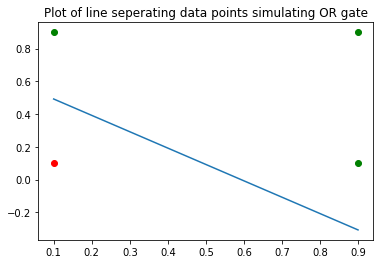

In [11]:
x_p=np.linspace(0.1,0.9,20)
y_p=-((final_weights[0][0]/final_weights[0][2])+ \
     ((final_weights[0][1]/final_weights[0][2])*x_p))
plt.plot(0.1, 0.1, 'ro')
plt.plot(0.1, 0.9, 'go')
plt.plot(0.9, 0.1, 'go')
plt.plot(0.9, 0.9, 'go')
plt.plot(x_p,y_p)
plt.title("Plot of line seperating data points simulating OR gate")

#### Plots for Batch training process
Epochs vs Error

As the number of epochs increases, error will decrease. This is because training time with increase in number of iterations casuing to fit the model more effectively.

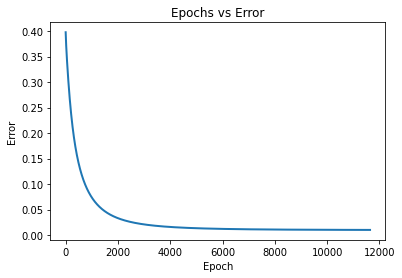

In [12]:
plot_graph(num_of_epochs, errors_in_epoch, "Error")

Epochs vs intermediate Weight_1's in each epoch

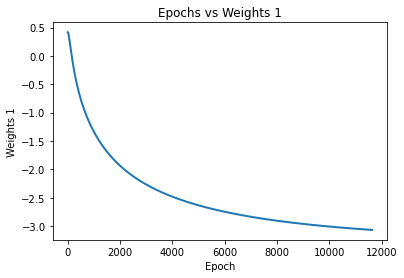

In [13]:
plot_graph(num_of_epochs, weights_in_epoch[:,0][:,0], "Weights 1")

Epochs vs intermediate Weight_2's in each epoch

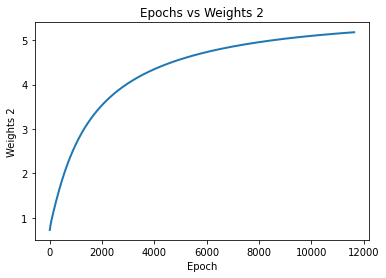

In [14]:
plot_graph(num_of_epochs, weights_in_epoch[:,0][:,1], "Weights 2")

Epochs vs intermediate Weight_3's in each epoch

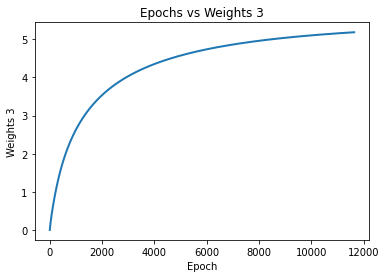

In [15]:
plot_graph(num_of_epochs, weights_in_epoch[:,0][:,2], "Weights 3")

Learning Rates vs Iteration:
As the learning rate decrease, number of itrations required for converging  increases as expected

In [16]:
def play_with_learning_rate(input_data, target_data, do_batch=True):
    iteration_per_rate=[]
    learning_rates=np.linspace(0.01, 1, 100)
    for lr_rate in learning_rates:
        if do_batch:
            iterations, final_weights, errors, weights= \
            batch_training(input_data,target_data, \
                           learning_rate=lr_rate, print_messages=False)
        else:
            iterations, final_weights, weights, errors= \
            online_training(input_data, target_data, epochs=1000000, \
                            learning_rate=lr_rate, print_messages=False)
        iteration_per_rate.append(iterations)
    plt.plot(np.array(iteration_per_rate), learning_rates)
    plt.title("Iterations vs Learning Rate")
    plt.xlabel("Iteration")
    plt.ylabel("Learning Rate")

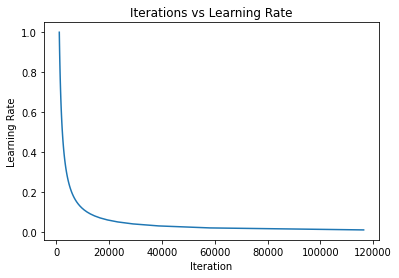

In [17]:
play_with_learning_rate(input_data, target_output)

#### Online Training
Instead of considering every training sample for updating weights, each data point is used to update them

In [18]:
def online_training(x, y, learning_rate=0.01, error_threshold=0.01, \
                    epochs=30000, print_messages=True):
    np.random.seed(1)
    online_weights=np.random.rand(1,3)
    iteration=1
    errors, weights = [],[]
    while iteration < epochs:
        error=0
        if print_messages:
            print("Iteration:", iteration)
            print("===================================")
        for x_i, y_i in zip(x,y):
            output_i=calculate_ouptut(x_i, online_weights)
            error=error + np.power((output_i-y_i), 2)
            change_in_wt_i=-learning_rate*(y_i-output_i)*output_i*(1-output_i)*x_i
            online_weights=online_weights-change_in_wt_i
        iteration+=1 
        errors.append(error)
        weights.append(online_weights)
        if print_messages:
            print("Weights:",online_weights)
            print("Output: ", calculate_ouptut(x, online_weights))
            print("Error:", error)
        if error < error_threshold:
            break
    return iteration-1, online_weights, np.array(weights), np.array(errors)

In [19]:
epochs, final_weights, weights_in_epoch, errors_in_epoch = \
online_training(input_data, target_output, learning_rate=0.1, print_messages=False)

Usually, number of epochs for weight convergence in online learning(stocastic gradient descet) will be less than in batch training. Number of epochs for convergence are

In [20]:
epochs

11629

Final weights obtained after online training are

In [21]:
final_weights

array([[-3.06711053,  5.17993986,  5.18008907]])

Output calcualted using obtained weights are

In [22]:
print(calculate_ouptut(input_data, final_weights))

[[0.11597531 0.8921568  0.89214532 0.99808652]]


Plot of points and obtained line using online training

Text(0.5, 1.0, 'Plot of line seperating data points simulating OR gate')

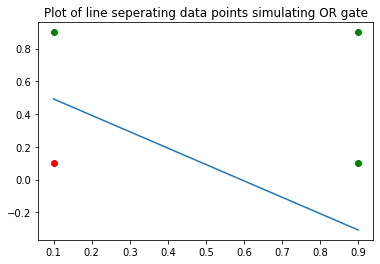

In [23]:
x_p=np.linspace(0.1,0.9,20)
y_p=-((final_weights[0][0]/final_weights[0][2])+ \
     ((final_weights[0][1]/final_weights[0][2])*x_p))
plt.plot(0.1, 0.1, 'ro')
plt.plot(0.1, 0.9, 'go')
plt.plot(0.9, 0.1, 'go')
plt.plot(0.9, 0.9, 'go')
plt.plot(x_p,y_p)
plt.title("Plot of line seperating data points simulating OR gate")

#### Plots for Online training process

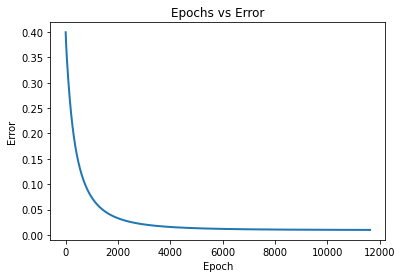

In [24]:
plot_graph(epochs, errors_in_epoch, "Error")

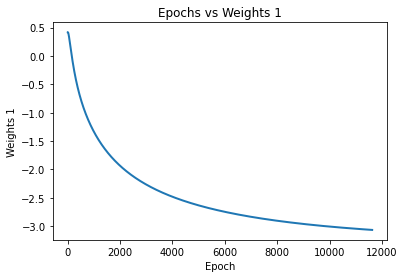

In [25]:
plot_graph(epochs, weights_in_epoch[:,0][:,0], "Weights 1")

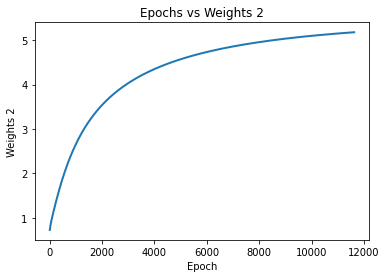

In [26]:
plot_graph(epochs, weights_in_epoch[:,0][:,1], "Weights 2")

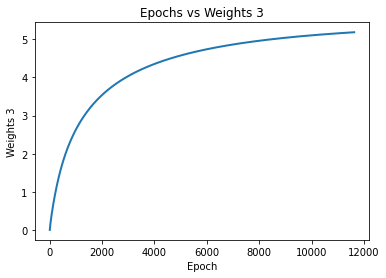

In [27]:
plot_graph(epochs, weights_in_epoch[:,0][:,2], "Weights 3")

Learning rates vs Iterations

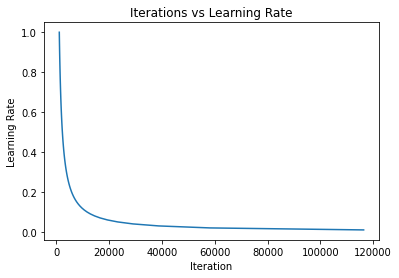

In [28]:
play_with_learning_rate(input_data, target_output, do_batch=False)